In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/Gladie34/studentsperformance_data/main/StudentsPerformance.csv")

show Top 5 Records

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


shape of the data

In [7]:
data.shape


(1000, 8)

2 Data Information

Sex of students(male/female)
Race/ethnicity:ethinicity of students(Group A,B,C,D,E)
Parental level of education:parents' final education(bachelor's degree,some college,master's degree,associate degree,high school)
lunch:having lunch before test()standard or free/reduced
test preparation course:complete or not complete before test
math score
reading score
writing

3.Data checks to perform

Check missing values
Check duplicates
Check data types
Check number of uniques values of each column
Check statistics of data set
Check various categories present in the different categorical column

##3.1 Check missing values

In [8]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values

##3.2 Check Duplicates

In [9]:
data.duplicated().sum()

0

No duplicates

In [10]:
##3.3 Check data types

In [11]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

##3.4 Check number of unique values for each column

In [12]:
df=data.nunique()
print(f'The data has the following unique values')
print(df)

The data has the following unique values
gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64


In [13]:
#check statistics of the data
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight From the above description: 

-All means are close to each other,it lies between 66-69 
-All the std are close to each other ,they are bewtween 14-15 
-On minimun score,math had a 0%,reading 17% and writting with a min score of 10%.While they all had a maximun score of 100%



In [14]:
#string data
data.describe(include=object)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


-The total number of students were 1000
-The unique genders were 2 that is female and male with the female having the most numbers of 518
-The race/ethnicity  column had 5 unique groups,with group C having the highest count of 319
-parental level of education had 6 unique groups with parent who went to some college being the most that 226 of them.
-The lunch options had 2 categories with standard  lunch  being taken by  the most students

In [15]:
#numeric and categorical columns

numeric_features=[feature for feature in data.columns if data[feature].dtype !='O']
categorical_feature =[feature for feature in data.columns if data[feature].dtype =='O']

print(f'The numeric features are {len(numeric_features)}')
print(f'The categorical feature are {len(categorical_feature )}')



The numeric features are 3
The categorical feature are 5


In [16]:
#Total_scores
data["Total_scores"]=data["math score"]+data["reading score"]+data["writing score"]
data["Total_scores"]


0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: Total_scores, Length: 1000, dtype: int64

In [17]:
data["Average"]=data["Total_scores"]/3
data["Average"].sort_values(ascending=False).head(5)


916    100.000000
458    100.000000
962    100.000000
114     99.666667
179     99.000000
Name: Average, dtype: float64

In [18]:
reading_full=data[data["reading score"]==100]['Average'].count()
math_full=data[data["math score"]==100]['Average'].count()
writing_full= data[data["writing score"]==100]['Average'].count()
print(f'The number of students with full marks in maths were:{math_full}')
print(f'The number of students with full marks in reading were:{reading_full}')
print(f'The number of students with full marks in  writing were:{writing_full}')


The number of students with full marks in maths were:7
The number of students with full marks in reading were:17
The number of students with full marks in  writing were:14


In [19]:
#Students with less than 50% on average
reading_less50=data[data["reading score"]<50]['Average'].count()
math_less50=data[data["math score"]<50]['Average'].count()
writing_less50= data[data["writing score"]<50]['Average'].count()
print(f'The number of students with full marks in maths were:{math_less50}')
print(f'The number of students with full marks in reading were:{reading_less50}')
print(f'The number of students with full marks in  writing were:{writing_less50}')


The number of students with full marks in maths were:135
The number of students with full marks in reading were:90
The number of students with full marks in  writing were:114


Insights
-From  the above values we get students performed the worst in maths 
-The best performance is writing


4.Exploring data(Visualization)


4.1 Visualize average score distribution to make some conclusion
    -Histogram
    -Kernel distribution function


<Axes: xlabel='Average', ylabel='Count'>

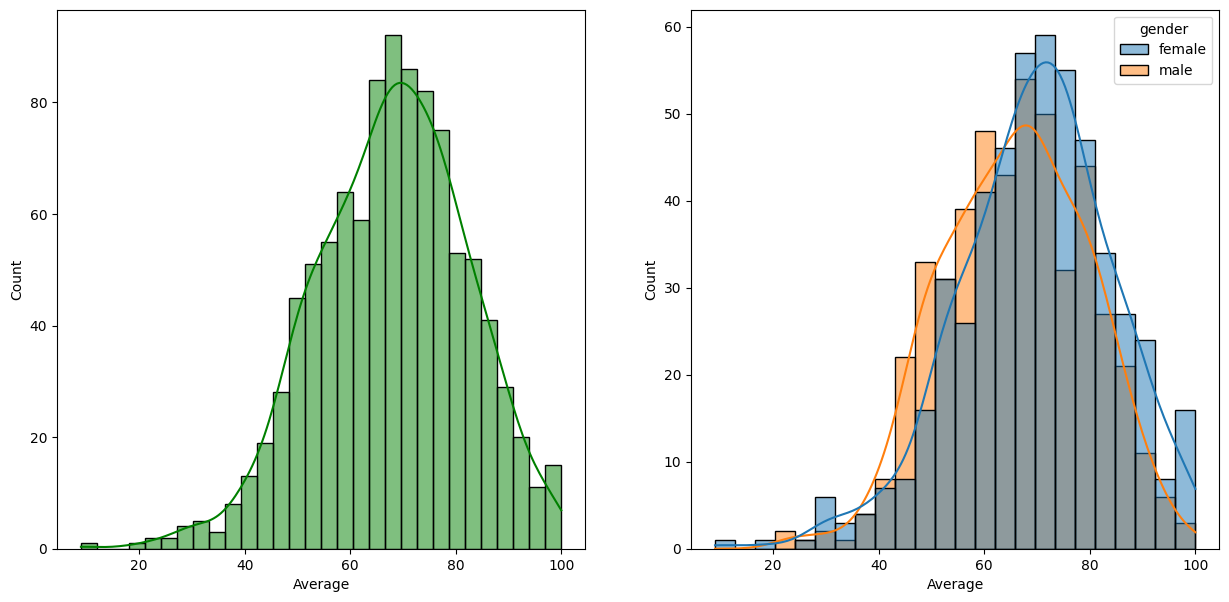

In [20]:
#4.1.1
fig,axs =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x="Average",bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='gender')


Female students perform well than male students 

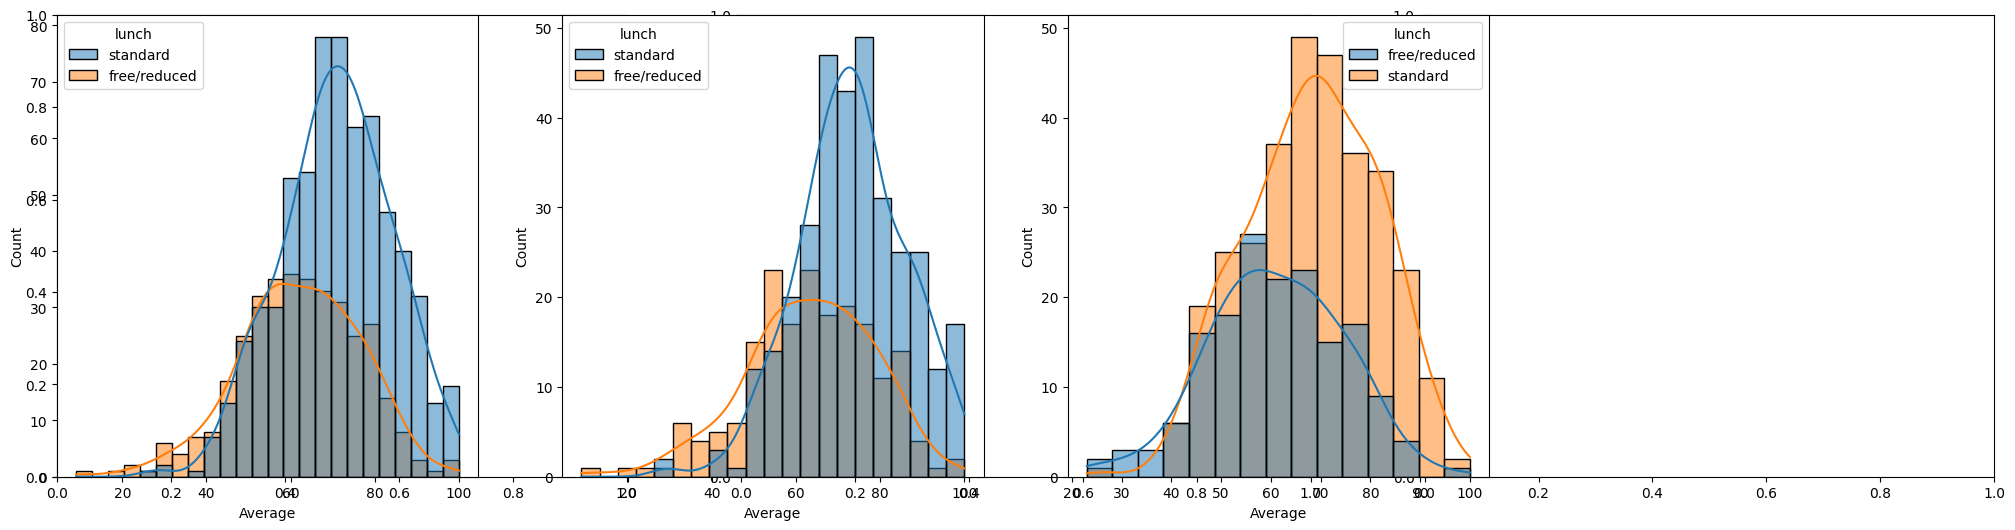

In [21]:
#4.1.2
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data['gender']=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

Insights:
-Students who take standard lunch perform well exams
-Female students who take standard lunch performs well in exams
-Male students who take standard lunch perform well in exams


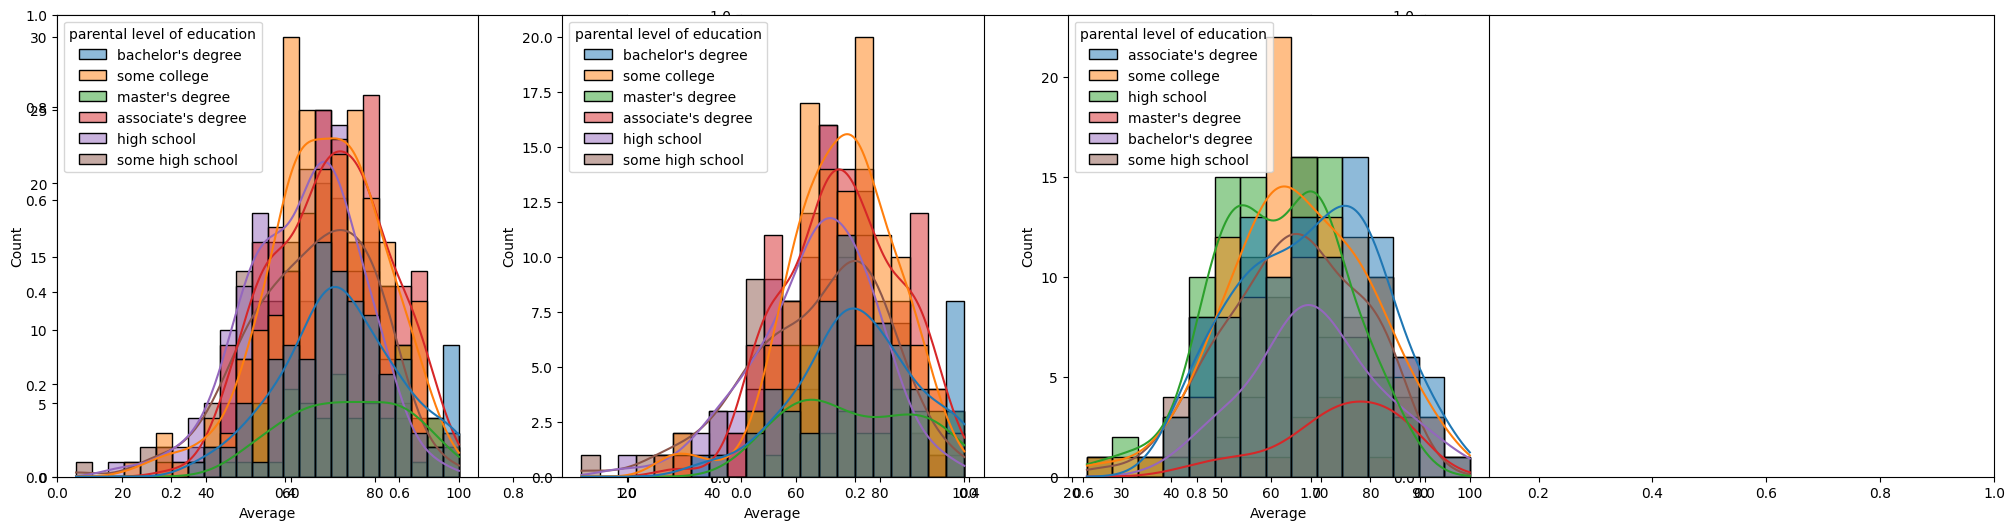

In [22]:
#4.1.3
fig,axs=plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=data[data['gender']=='female'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.show()

<Axes: title={'center': 'WRITTING SCORE'}, ylabel='writing score'>

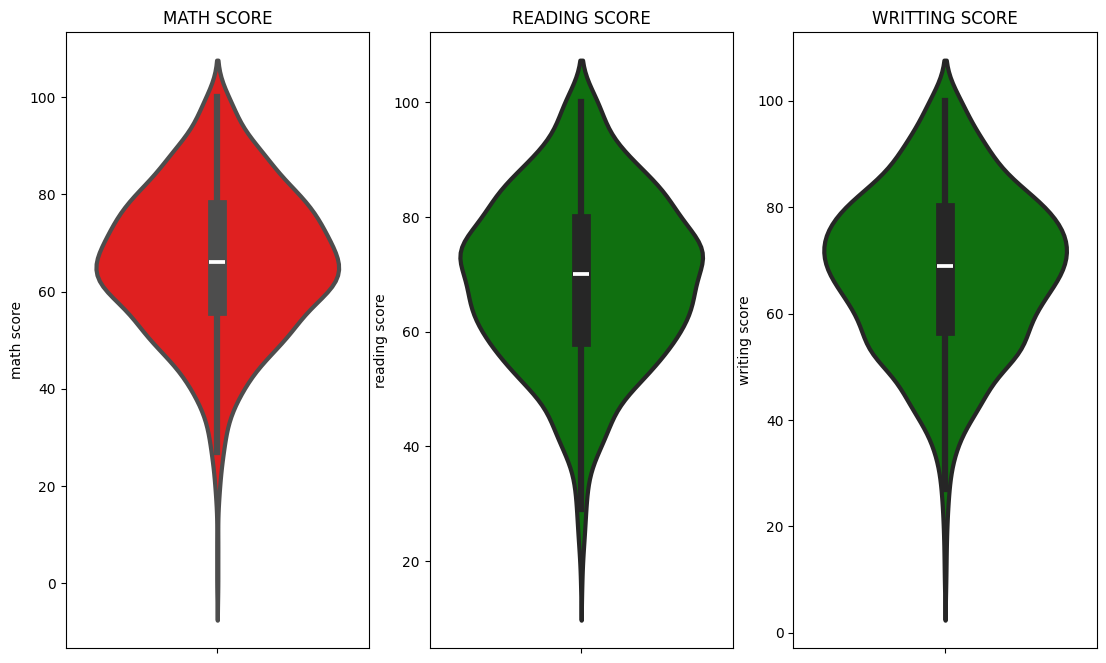

In [23]:
#Maximum Score of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)

plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)

plt.subplot(1,4,3)
plt.title('WRITTING SCORE')
sns.violinplot(y='writing score',data=data,color='green',linewidth=3)

From the above three plots ,it is cleaar that most students score between 60-80 in maths whereas in reading and writing most of them score from 50-80

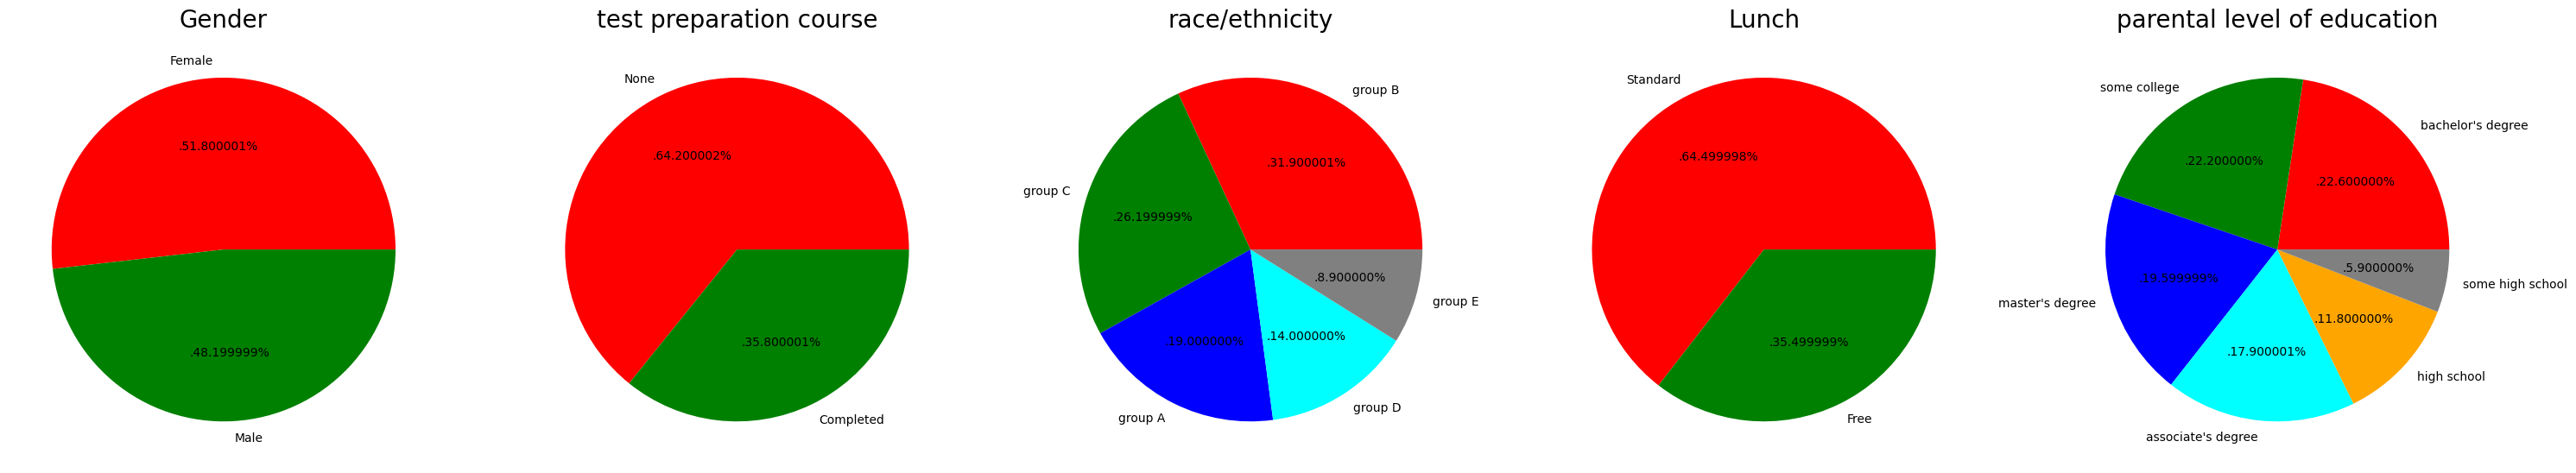

In [24]:
#4.3 multivariate analysis using pieplot

plt.rcParams["figure.figsize"] = (30, 12)


plt.subplot(1,5,1)
size=data['gender'].value_counts()
labels='Female','Male'
color=['red','green']
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=data['test preparation course'].value_counts()
labels='None','Completed'
color='red','green'
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test preparation course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=data['race/ethnicity'].value_counts()
labels='group B', 'group C', 'group A', 'group D', 'group E'
color='red','green','blue','cyan','grey'
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=data['lunch'].value_counts()
labels='Standard','Free'
color='red','green'
plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
size=data['parental level of education'].value_counts()
labels="bachelor's degree",'some college',"master's degree","associate's degree", 'high school','some high school'
color='red','green','blue','cyan','orange','grey'
plt.pie(size,colors=color,labels=labels,autopct='.%4f%%')
plt.title('parental level of education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#Insight

-Number of male and female students is almost equal
-Most students did not complete test prepeartion course
-Group B had the highest ethnicity
-Most students take standard lunch
-MOse parents went to some college


In [25]:
data.gender.unique()

array(['female', 'male'], dtype=object)

4.4 Feature ise Visualization


check on:
-How is distribution
-Does gender has any impact on students performance?

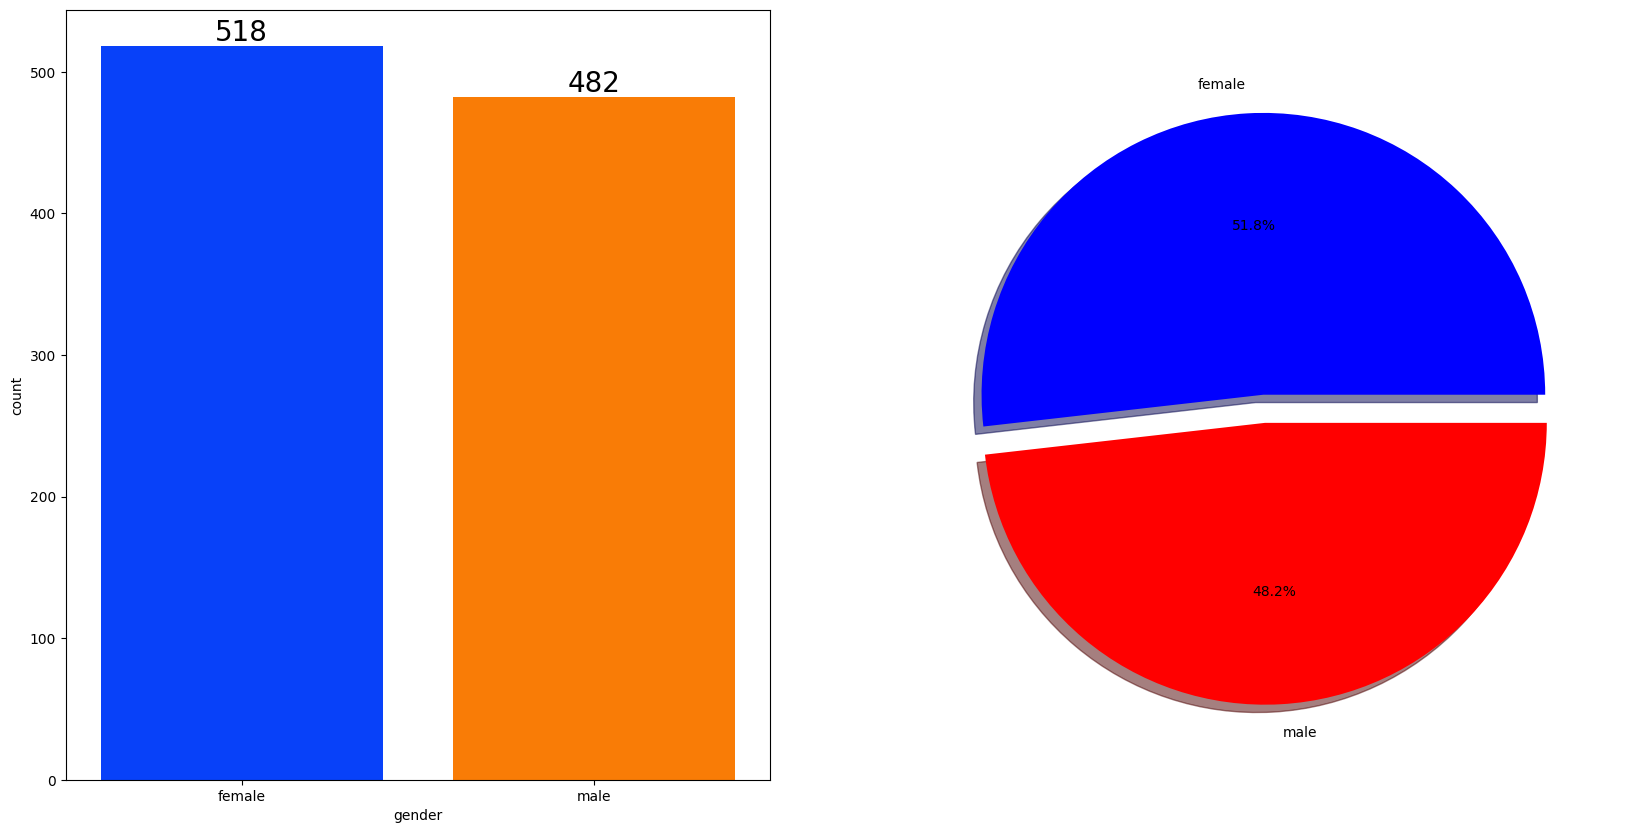

In [26]:
f,ax = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=data['gender'],data=data,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=data['gender'].value_counts(), labels=['female', 'male'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'])

plt.show()

Gender has a balanced data with femae students being 518(48%) and male students  being 482(52%)

In [ ]:
BIVARIATE ANALYSIS

Does gender have any impact on students performance

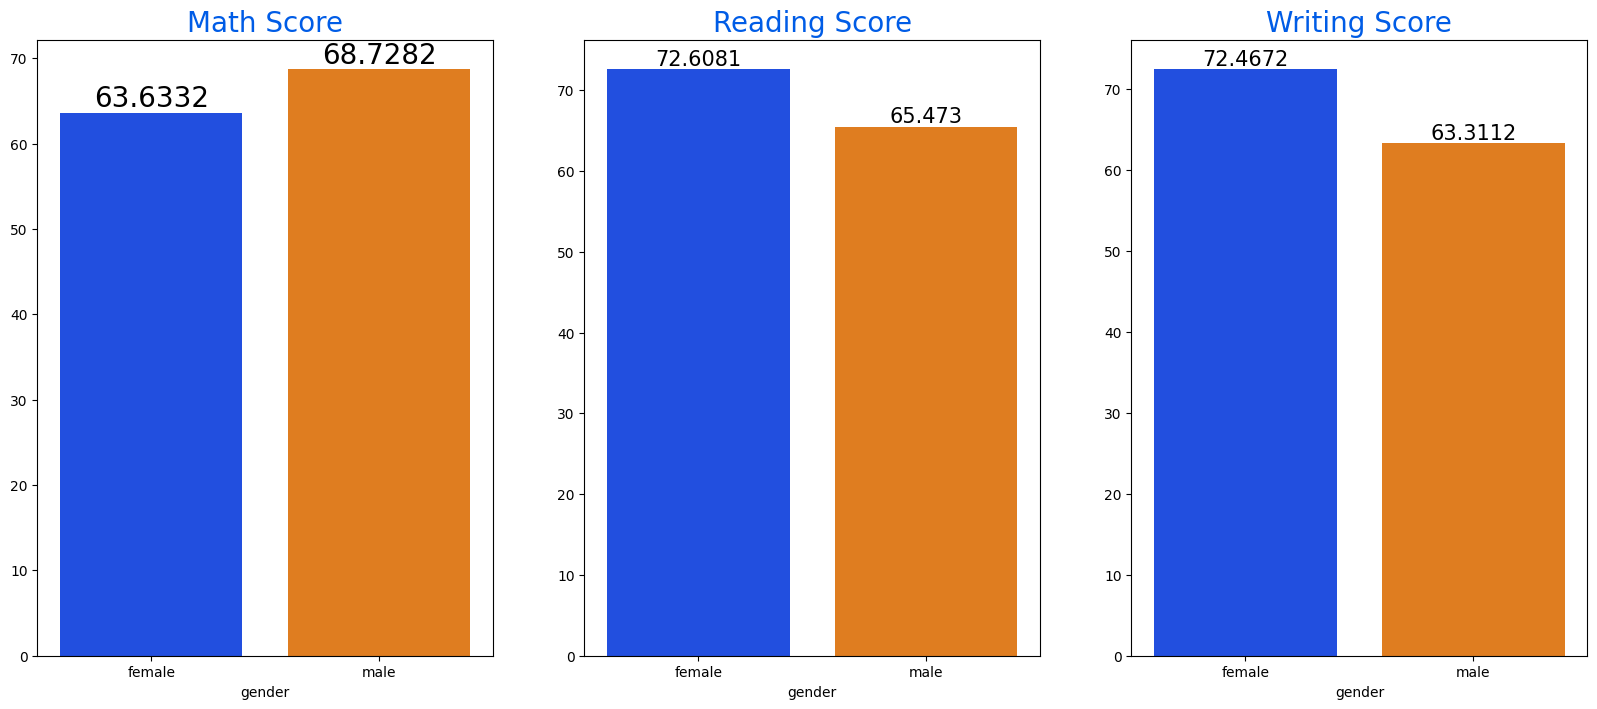

In [31]:
gender_group=data.groupby('gender')

f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=gender_group['math score'].mean().index,y=gender_group['math score'].mean().values,palette='bright',ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for  container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.barplot(x=gender_group['reading score'].mean().index, y=gender_group['reading score'].mean().values, palette='bright', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=gender_group['writing score'].mean().index, y=gender_group['writing score'].mean().values, palette='bright', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)


plt.show()
     

Does race and ethnicity has any impact on performance

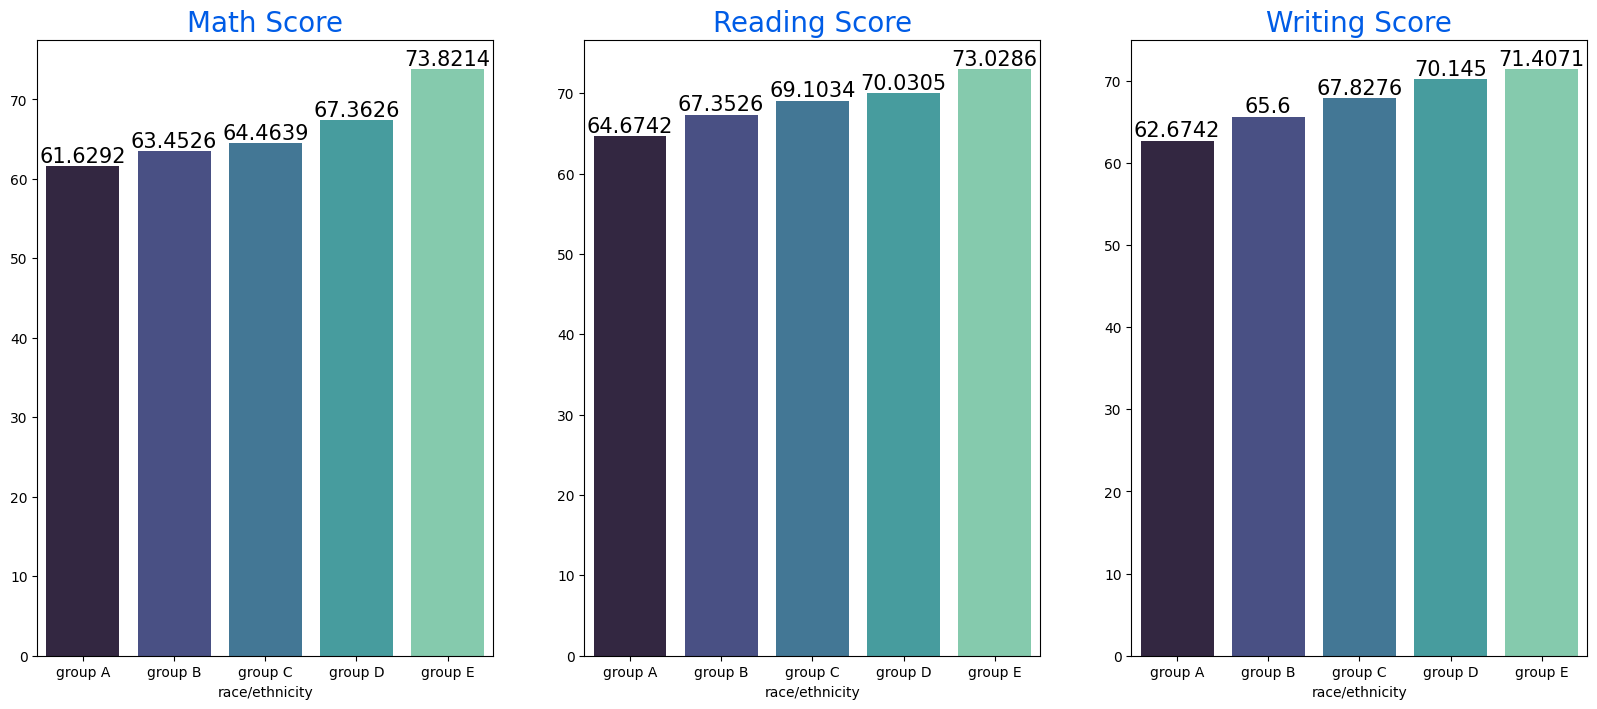

In [32]:
Group_data2 = data.groupby("race/ethnicity")

f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='mako', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)


plt.show()
     

Group E had the highest score in al the subjects while grop A had the lowest in all the scores